### DBSCAN
This guy is robust to outliers, can cluster non-linear data easily. We'll see how:

In [274]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [295]:
X, y = make_moons(n_samples=400, noise=0.07)

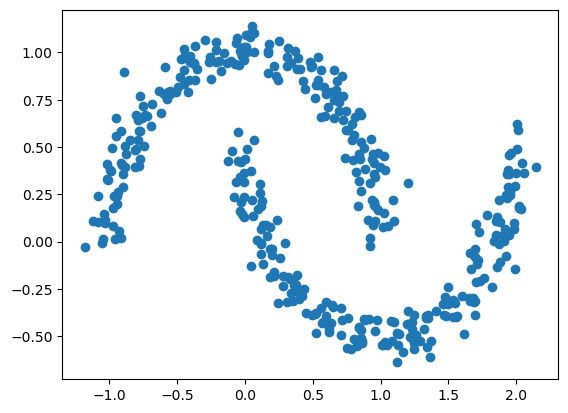

In [297]:
plt.scatter(X[:,0],X[:,1])

In [299]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [301]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN()  #can use eps=[values] for hyperparameter tuning
dbs.fit(X)

DBSCAN()

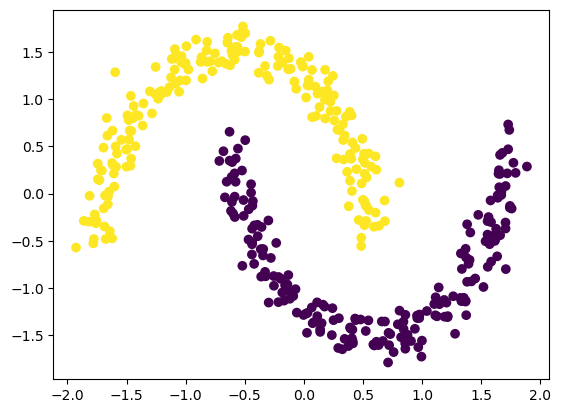

In [303]:
plt.scatter(X[:,0],X[:,1],c=dbs.labels_)

Easy as that. 

If we are to use k-means on the other hand....

Text(0, 0.5, 'Silhouette Score')

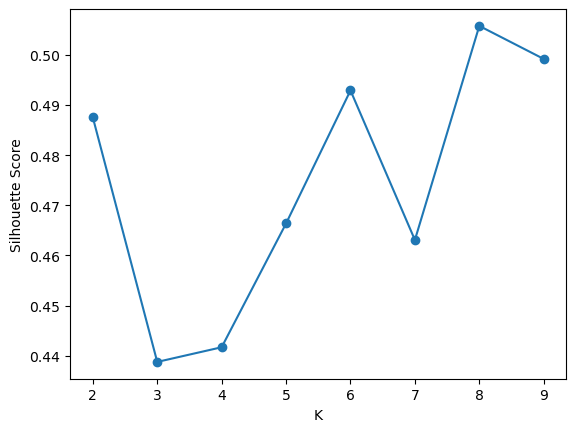

In [306]:
from sklearn.metrics import silhouette_score

sil_score = []
for i in range(2,10):                           # Use value of i >=2, or error pops up
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X)
    ypred = kmeans.fit_predict(X)
    score = silhouette_score(X, ypred)
    sil_score.append(score)

plt.plot(range(2,10), sil_score, marker='o')
plt.xlabel('K')
plt.xticks(range(2,10))
plt.ylabel('Silhouette Score')

Althogh it tries to give K=2, and Knee locator gives the same, silhouette score is max at k=8

DBSCAN >>>>